use suffled3.csv

In [21]:
import pandas as pd
df = pd.read_csv('suffled3.csv', parse_dates=['Date'], index_col='Date')
df.sort_index(inplace=True)
df.index.name = 'Date'
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0
...,...,...,...,...,...,...,...
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0


In [22]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


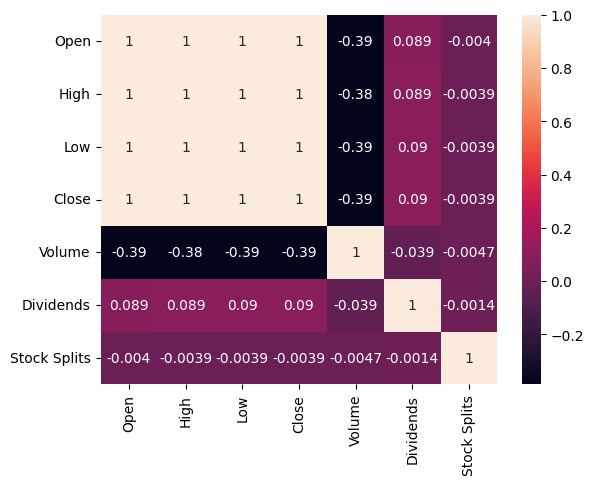

In [23]:
import seaborn as sb
from matplotlib import pyplot as plt
dataplot = sb.heatmap(df.corr(), annot=True)

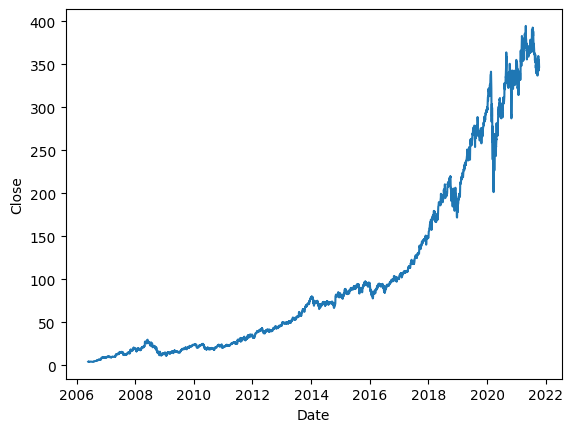

In [24]:
dataplot = sb.lineplot(data=df, x=df.index, y=df.Close)

In [25]:
df = df[['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'Close']]

In [26]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size=0.2)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

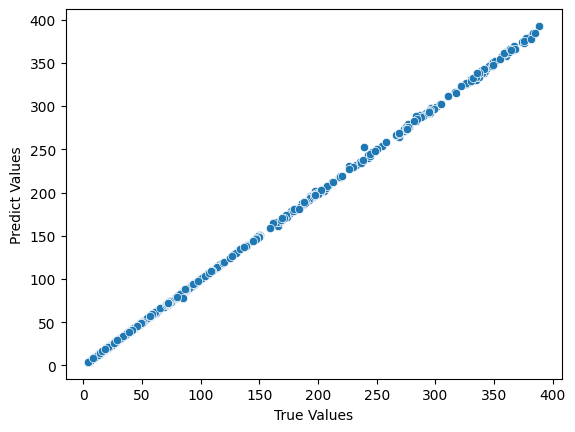

In [30]:
ax = sb.scatterplot(x=y_true, y=y_pred)
ax.axes.set_xlabel('True Values')
ax.axes.set_ylabel('Predict Values')
plt.show()


Linear Regression prediction with test_size=0.2 the label is close

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
result = f'R²: {r2_score(y_true=y_true, y_pred=y_pred)}\n'
result += f'Mean Squared Error (MSE): {mean_squared_error(y_true=y_true, y_pred=y_pred)}\n'
result += f'Root Mean Squared Error (RMSE): {mean_squared_error(y_true=y_true, y_pred=y_pred)**0.5}\n'
result += f'Mean Absolute Error (MAE): {mean_absolute_error(y_true=y_true, y_pred=y_pred)}\n'
result += f'Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)}'
print(result)

R²: 0.9999035163341108
Mean Squared Error (MSE): 1.0006336076181015
Root Mean Squared Error (RMSE): 1.0003167536426156
Mean Absolute Error (MAE): 0.48509901144513445
Mean Absolute Percentage Error (MAPE): 0.005909834527217121


2- write run postgress docker command
and save y predicted labeles with datatime in database

sudo docker run --name q7_postgres -e POSTGRES_DB=ml -e POSTGRES_USER=omid -e POSTGRES_PASSWORD=1234 -p 5432:5432 -v data:/var/lib/postgresql/data -d postgres

In [76]:
from typing import List, Dict, Tuple, Any, Union
import psycopg2

class DB_manip():
    def __init__(self):
        self._connect_db_()
        
    def _connect_db_(self):
        self.conn = psycopg2.connect(
        host="0.0.0.0",
        database="ml",
        user="omid",
        password="1234"
        )
        self.cur = self.conn.cursor()

    def create_table(self, table_name, schema):
        command = f'CREATE TABLE {table_name} ({schema});'
        self.cur.execute(command)
        self.conn.commit()

    def insert_data(self, table_name, data: Dict):
        self._insert_data(table_name, data)
        self.conn.commit()
    
    def _insert_data(self, table_name ,data: Dict):
        keys = []
        values = []
        query_keys, query_values = '(', '('
        for key, value in data.items():
            keys.append(key)
            values.append(str(value))
        keys = ', '.join(keys)
        values = ', '.join(values)
        query_keys += keys + ')'
        query_values += values + ')'
        command = f"""INSERT INTO {table_name} {query_keys}
        VALUES {query_values};"""
        self.cur.execute(command)

    def insert_batch_data(self, table_name, data: List[Dict]):
        for row in data:
            self._insert_data(table_name=table_name, data=row)
            self.conn.commit()



In [78]:
db_object = DB_manip()
schema = f'''
index serial PRIMARY KEY NOT NULL,
y_true double precision,
y_pred double precision
'''
db_object.create_table(table_name='linear_regression', schema=schema)


In [79]:
data = []
index = 1
for true, pred in zip(y_true, y_pred):
    row = {'index': index, 'y_true': true, 'y_pred': pred}
    index += 1
    data.append(row)

db_object.insert_batch_data(table_name='linear_regression', data=data)

3- scrape  https://api.divar.ir/v8/web-search/tehran/buy-apartment?districts=992 api to find token then use https://api.divar.ir/v5/posts/{token} api and save apartment price and location property in json file

1- Supervised vs unsupervised
Supervised learning is when we know true answers that the model should produce and use them as label in the process of training, whereas unsupervised learning is when we do not have any label such as when we want to discriminate customers who have similar interests the we try to cluster them.

2- what is Semisupevised

3- what is the effect of Learning rate low and up
If learning rate is too high, there is possibility that the steps take us nowhere since they do not converge.
On the other hand, having too many steps, the process of learning becomes too long.

4- instance base vs model based:
A model that tweaks itself based on one single training example at each step is instance based.
Model based learning is when the model is refined at each step based on all the training examples, considering the cost function.

5- Data is more important or algorithm
The important point is that we should have enough data and choose the appropriate algorithm to earn the best result. data should be adequate to represent the phenomenon.

6- what is the meaning of Overfit and underfit and what can we do if they happen?
When the model generates precise results for the test dataset, and at the same time, it fails to predict labels at a satisfactory level for validation data or when put in practice, we say that the model is overfit, since it has too much dependency on the test dataset. An underfit model is at opposite end of the spectrum. It takes place when the model cannot predict satisfactory results even for the test dataset.

روش های گرادیان دیسنت چیست؟
در روش گرادیان دیسنت ما یک تابع به نام تابع هزینه تعریف میکنیم که بطور مثال میتواند میانگین مربعات اختلاف نتایج مدل با مقادیر مطلوب و واقعی لیبل ها را در هر قدم از پروسه یادگیری محاسبه کند و ما هدف را روی کمینه کردن این تابع میگذاریم. حال گرادیان دیسنت یک الگوریتم است که به ما در کمینه کردن تابع هزینه کمک میکند. بدین ترتیب که گرادیان تابع هزینه را روی هر پارامتر محاسبه میکنیم و آن پارامتر را در خلاف جهت گرادیان با ضریبی به نام نرخ یادگیری بروز رسانی میکنیم. به این ترتیب طی چندین مرحله به جایی میرسیم که تابع هزینه به کمینه مقدار خود میرسد و دقت مدل ما به بیشترین حد ممکن خواهد رسید. یکی از نکات این است که در الگوریتم گرادیان دیسنت نقطه ابتدایی پارامتر های مدل که ما به دلخواه انتخاب میکنیم ممکن است در نتیجه نهایی عاملی تعیین کننده باشد. اگر تابع هزینه چند نقطه کمینه محلی داشته باشد ممکن است با انتخاب دو نقطه متفاوت ابتدایی هر بار به یکی از این نقاط کمینه برسیم.  